In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_no_maxpool_batchnorm

num_epochs = 20
lr = 0.001

model = CNN_no_maxpool_batchnorm()
model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8526833333333333 
Test Acc epoch 0 : 0.8786 
Train Acc epoch 1 : 0.9045166666666666 
Test Acc epoch 1 : 0.8941 
Train Acc epoch 2 : 0.9255833333333333 
Test Acc epoch 2 : 0.8958 
Train Acc epoch 3 : 0.9407 
Test Acc epoch 3 : 0.8887 
Train Acc epoch 4 : 0.9498833333333333 
Test Acc epoch 4 : 0.8894 
Train Acc epoch 5 : 0.9569333333333333 
Test Acc epoch 5 : 0.8919 
Train Acc epoch 6 : 0.9629666666666666 
Test Acc epoch 6 : 0.8973 
Train Acc epoch 7 : 0.9668166666666667 
Test Acc epoch 7 : 0.8995 
Train Acc epoch 8 : 0.9701 
Test Acc epoch 8 : 0.8937 
Train Acc epoch 9 : 0.9749666666666666 
Test Acc epoch 9 : 0.8892 
Train Acc epoch 10 : 0.9787833333333333 
Test Acc epoch 10 : 0.8895 
Train Acc epoch 11 : 0.9808833333333333 
Test Acc epoch 11 : 0.8846 
Train Acc epoch 12 : 0.98225 
Test Acc epoch 12 : 0.8951 
Train Acc epoch 13 : 0.9834666666666667 
Test Acc epoch 13 : 0.8933 
Train Acc epoch 14 : 0.98545 
Test Acc epoch 14 : 0.8883 
Train Acc epoch 15 : 0.98598333

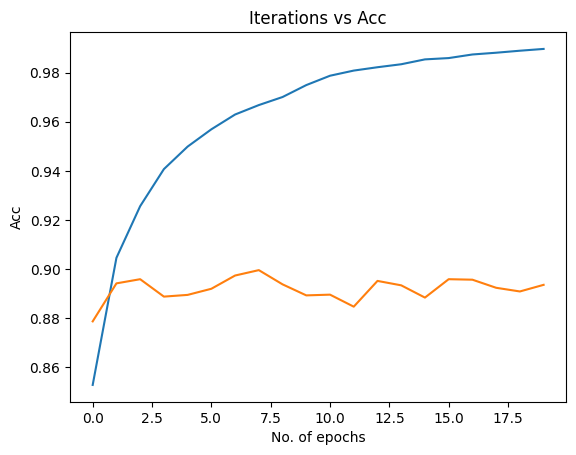

In [5]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

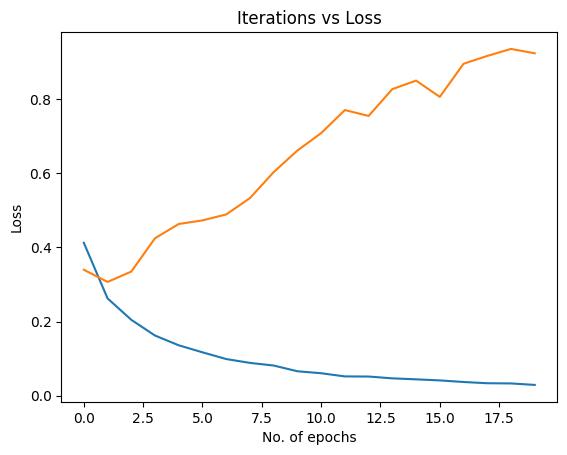

In [6]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [7]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.8995 | Best Epoch : 7


## Pickle out results and accuracies

In [8]:
import pickle
import os

file_name = 'baseline_CNN_no_batchnorm_maxpool.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [9]:
file_name = 'baseline_CNN_no_batchnorm_maxpool.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8526833333333333, 0.9045166666666666, 0.9255833333333333, 0.9407, 0.9498833333333333, 0.9569333333333333, 0.9629666666666666, 0.9668166666666667, 0.9701, 0.9749666666666666, 0.9787833333333333, 0.9808833333333333, 0.98225, 0.9834666666666667, 0.98545, 0.9859833333333333, 0.98745, 0.9881666666666666, 0.9889833333333333, 0.9897166666666667]
[0.8786, 0.8941, 0.8958, 0.8887, 0.8894, 0.8919, 0.8973, 0.8995, 0.8937, 0.8892, 0.8895, 0.8846, 0.8951, 0.8933, 0.8883, 0.8958, 0.8956, 0.8923, 0.8908, 0.8935]
[0.41242747479029046, 0.26248809383876287, 0.2047344817281532, 0.16227508804945548, 0.13597640613598355, 0.1170540075463209, 0.09887947847665564, 0.08849303784476382, 0.08139840160597807, 0.06595152357557435, 0.060613839599147026, 0.052048645454889804, 0.05170595904649384, 0.046806093976537046, 0.04416101999647383, 0.04126676241619024, 0.03698979507049999, 0.03363770565729457, 0.033114721336817025, 0.02908736738622802]
[0.33981896088093144, 0.30688969564588764, 0.3348772058947177, 0.4248204